#**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

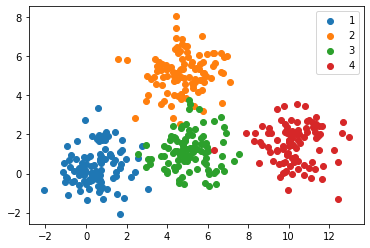

In [60]:
# write your code here

#generate 100 DATA POINTS FOR EACH CLASS AND STORE ALL OF THEM IN A arracy
data_set_1=np.random.multivariate_normal(mean=np.array([0.5,0]),cov=np.identity(2),size=(100))
data_set_2=np.random.multivariate_normal(mean=np.array([5,5]),cov=np.identity(2),size=(100))
data_set_3=np.random.multivariate_normal(mean=np.array([5,1]),cov=np.identity(2),size=(100))
data_set_4=np.random.multivariate_normal(mean=np.array([10,1.5]),cov=np.identity(2),size=(100))


total_Data=np.concatenate((data_set_1,data_set_2,data_set_3,data_set_4))



plt.scatter(x=data_set_1[:,0],y=data_set_1[:,1])
plt.scatter(x=data_set_2[:,0],y=data_set_2[:,1])
plt.scatter(x=data_set_3[:,0],y=data_set_3[:,1])
plt.scatter(x=data_set_4[:,0],y=data_set_4[:,1])
plt.legend("1234")

# Generate an array to know which point belongs to which class
actual_answers=[0]*100+[1]*100+[2]*100+[3]*100

In [61]:
def plot_graph(temp,combined_centroids):
    plt.figure()
    indexes=np.where(temp==0)[0]
    plt.scatter(x=total_Data[indexes,0],y=total_Data[indexes,1],color='red')
    indexes=np.where(temp==1)[0]
    plt.scatter(x=total_Data[indexes,0],y=total_Data[indexes,1],color='blue')
    indexes=np.where(temp==2)[0]
    plt.scatter(x=total_Data[indexes,0],y=total_Data[indexes,1],color='green')
    indexes=np.where(temp==3)[0]
    plt.scatter(x=total_Data[indexes,0],y=total_Data[indexes,1],color='brown')
    plt.scatter(x=combined_centroids[:,0],y=combined_centroids[:,1],color="black")
    plt.show()

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[6.53656943 2.87219604]
 [8.06299419 7.17441693]
 [1.75114506 1.43216865]
 [5.77876691 5.96357103]]


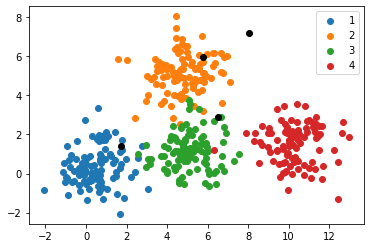

In [62]:


K=4 #NUmber of centroids in our case

centroid_1=np.random.uniform(low=0,high=10, size=(4,2))
combined_centroids=centroid_1
print(combined_centroids)
plt.scatter(x=data_set_1[:,0],y=data_set_1[:,1])
plt.scatter(x=data_set_2[:,0],y=data_set_2[:,1])
plt.scatter(x=data_set_3[:,0],y=data_set_3[:,1])
plt.scatter(x=data_set_4[:,0],y=data_set_4[:,1])
plt.scatter(x=combined_centroids[:,0],y=combined_centroids[:,1],color='black')
plt.legend("1234")


**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

for 0th iteration
Cost of function 2.4603798960590253
Difference in values 2.4603798960590253


<Figure size 432x288 with 0 Axes>

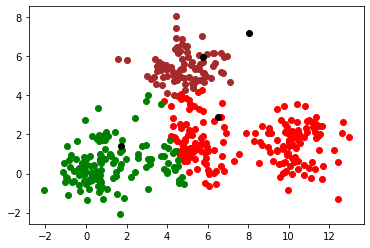



for 1th iteration
Cost of function 1.8564474876977721
Difference in values 0.6039324083612532


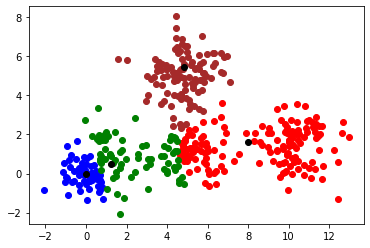



for 2th iteration
Cost of function 1.6724860630680871
Difference in values 0.183961424629685


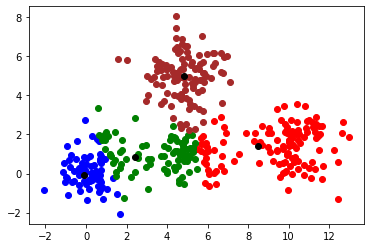



for 3th iteration
Cost of function 1.4125727909632377
Difference in values 0.2599132721048494


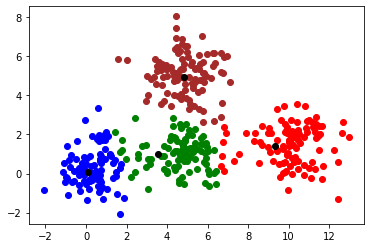



for 4th iteration
Cost of function 1.2241697205777808
Difference in values 0.1884030703854569


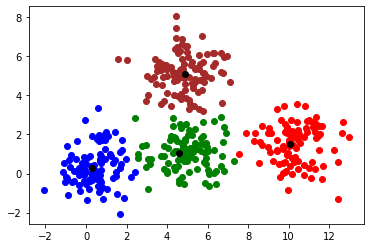



for 5th iteration
Cost of function 1.2074204999164513
Difference in values 0.016749220661329556


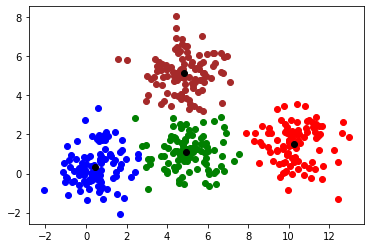



for 6th iteration
Cost of function 1.208422691437611
Difference in values 0.0010021915211597676


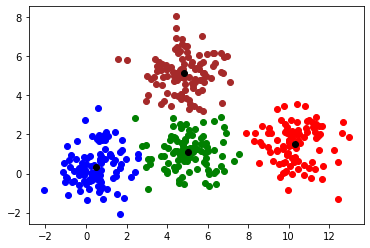



for 7th iteration
Cost of function 1.208422691437611
Difference in values 0.0

Final centroids obtained [[10.31768465  1.525384  ]
 [ 0.46929696  0.33619027]
 [ 5.02967102  1.10414524]
 [ 4.850068    5.13379531]]
Final cost obtained 1.208422691437611


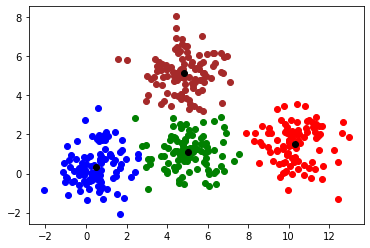

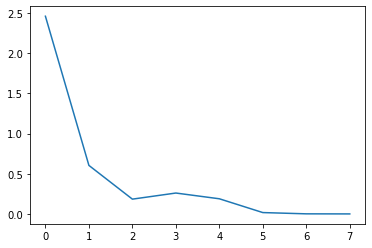

In [63]:
# write your code here
from turtle import color


def modulus(point,centroid):
    return pow(pow(point[0]-centroid[0],2)+pow(point[1]-centroid[1],2),0.5)

def pos_val(value):
    if(value<0):
        return -value
    else:
        return value


# Parameters
benchmark=0.000001
error_values=[]
old_cost_of_function=0
delta_array=[]
max_iterations=500
plt.figure()
for count in range(max_iterations):
    print("for "+str(count)+"th iteration")
    delta_array=[]
    for points in total_Data:
        dist=[]
        ## Find distance of that point from centroids and choose the cloest centroid
        for centroid in combined_centroids:
            dist.append(modulus(point=points,centroid=centroid))
        min_index=dist.index(min(dist))
        output_array=[]
        for i in range(K):
            if(i==min_index):
                output_array.append(1)
            else:
                output_array.append(0)
        delta_array.append(output_array)
    
    #calculate cost of the function
    cost_of_function=0
    for i in range(total_Data.shape[0]):
        cost_of_function+=modulus(total_Data[i],combined_centroids[delta_array[i].index(max(delta_array[i]))])
    cost_of_function/=total_Data.shape[0]
    # print("Old Cost of function",old_cost_of_function)
    print("Cost of function",cost_of_function)
    print("Difference in values",pos_val(cost_of_function-old_cost_of_function))
    error_values.append(pos_val(cost_of_function-old_cost_of_function))
    if(pos_val(cost_of_function-old_cost_of_function)<benchmark):
        old_cost_of_function=cost_of_function
        break
    old_cost_of_function=cost_of_function

    predicted_score_kmeans=[]
    for i in delta_array:
        predicted_score_kmeans.append(i.index(max(i)))
    temp=np.array(predicted_score_kmeans)

    plot_graph(temp=temp,combined_centroids=combined_centroids)
    #compute new means/centroids
    Number_of_points=[0]*4
    sum=[[0,0]]*4
    for i in range(400):
        pos=delta_array[i].index(max(delta_array[i]))
        Number_of_points[pos]+=1
        sum[pos]=np.add(sum[pos],total_Data[i])
    
    Number_of_points=np.c_[Number_of_points,Number_of_points]
    sum=np.divide(sum,Number_of_points+0.00001)
    combined_centroids=np.array(sum)
    
    
    print("\n")
print("\nFinal centroids obtained",combined_centroids)
print("Final cost obtained",old_cost_of_function)
plot_graph(temp=temp,combined_centroids=combined_centroids)
plt.figure()
plt.plot(error_values)        

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [64]:
# write your code here
from sklearn.metrics import homogeneity_score
#For homogeneity Score
predicted_score_kmeans=[]
for i in delta_array:
    predicted_score_kmeans.append(i.index(max(i)))
cluster_matrix=[predicted_score_kmeans[  :100]]+[predicted_score_kmeans[100:200]]+[predicted_score_kmeans[200:300]]+[predicted_score_kmeans[300:400]]
answer_matrix=[]
predicted_score_kmeans=np.array(predicted_score_kmeans)
for i in range(4):
    answers=[]
    for j in range(4):
        answers.append(cluster_matrix[i].count(j)) 
    answer_matrix.append(answers)
print(np.array(answer_matrix))
homogeneity_score_kmeans=homogeneity_score(actual_answers,predicted_score_kmeans)
print("homogeneity score",homogeneity_score_kmeans)



# For Silhouette Score
silhouette_value_kmeans=0
for i in range(400):
    total_distance=0
    count=0
    x=total_Data[i]
    cluster_of_x=predicted_score_kmeans[i]


    other_same_cluster=np.where(predicted_score_kmeans==cluster_of_x)[0]
    for point in other_same_cluster:
        if(point==i):
            continue
        total_distance+=modulus(total_Data[point],x)
        count+=1
    average_dist_same_cluster=total_distance/(count+0.0001)

    total_distance=0
    count=0
    other_diff_cluster=np.where(predicted_score_kmeans!=cluster_of_x)[0]
    for point in other_diff_cluster:
        total_distance+=modulus(total_Data[point],x)
        count+=1
    average_dist_other_clusters=total_distance/(count+0.0001)
    silhouette_value_kmeans+=(average_dist_other_clusters-average_dist_same_cluster)/max(average_dist_other_clusters,average_dist_same_cluster)
silhouette_value_kmeans/=400
print("Silhouette value",silhouette_value_kmeans)





[[ 0 98  2  0]
 [ 0  0  3 97]
 [ 0  1 95  4]
 [99  0  1  0]]
homogeneity score 0.9075740697566272
Silhouette value 0.7162687396015669


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

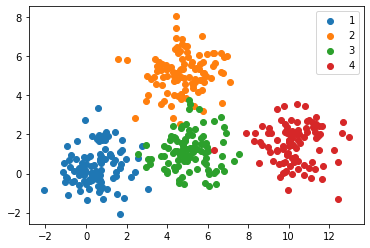

In [65]:
# write your code here
# Generate data sets
# data_set_1=np.random.multivariate_normal(mean=np.array([0.5,0]),cov=np.identity(2),size=(100))
# data_set_2=np.random.multivariate_normal(mean=np.array([5,5]),cov=np.identity(2),size=(100))
# data_set_3=np.random.multivariate_normal(mean=np.array([5,1]),cov=np.identity(2),size=(100))
# data_set_4=np.random.multivariate_normal(mean=np.array([10,1.5]),cov=np.identity(2),size=(100))

data=np.concatenate((data_set_1,data_set_2,data_set_3,data_set_4))

plt.scatter(x=data_set_1[:,0],y=data_set_1[:,1])
plt.scatter(x=data_set_2[:,0],y=data_set_2[:,1])
plt.scatter(x=data_set_3[:,0],y=data_set_3[:,1])
plt.scatter(x=data_set_4[:,0],y=data_set_4[:,1])
plt.legend("1234")

# Acutal class array
actual_answers=[0]*100+[1]*100+[2]*100+[3]*100

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [66]:
def initialization(data,K):

  # write your code here
  cols=data.shape[1] # dimension of data


  # random initiatization
  mean_vectors=np.random.randint(0,data.shape[0],K)
  mean_vectors=data[mean_vectors,:]
  mean_vectors=np.array(mean_vectors)

  # covariance matrix
  maximum_point=np.max(data)
  Covariance=np.zeros((cols,cols,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(cols)*maximum_point    
    
  # Weights
  weights=np.ones((K,1))/K
    
  return [mean_vectors.T,Covariance,weights]

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [67]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    mean_vectors=theta[0]
    Covariance=theta[1]
    weights=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(data),K))
    for i in range(K):
        itr=0 
        for x in data:
            sum_of_values=0 

            responsibility[itr][i]=weights[i]*multivariate_normal.pdf(x,mean=mean_vectors[:,i], cov=Covariance[:,:,i])
            for j in range(K):
                sum_of_values+=weights[j]*(multivariate_normal.pdf(x,mean=mean_vectors[:,j], cov=Covariance[:,:,j])+10**(-10))
            responsibility[itr][i]=responsibility[itr][i]/sum_of_values
            itr+=1

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [68]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    [N,K]=np.shape(responsibility) #N is number of data points
    cols=data.shape[1]
    
    #Compute weights
    Nk=np.sum(responsibility,axis=0)
    weights=Nk/N
        
    #Compute mean_vectors
    mean_vectors=np.zeros((K,cols))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] 
        mean_vectors[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    mean_vectors=np.transpose(mean_vectors)
        
    #Compute Covariance
    Covariance=np.zeros((cols,cols,K))        
    for k in range(K):
        for n in range(N):
            temp1=np.array(data[n,:]-mean_vectors[:,k])
            temp2=np.outer(temp1,temp1.T) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[mean_vectors,Covariance,weights]
    ll=0
    log_ll=0
    for n in range(N):
        for k in range(K):
            ll+=weights[k]*(multivariate_normal.pdf(data[n,:],mean=mean_vectors[:,k], cov=Covariance[:,:,k]))
        log_ll+=np.log(ll)
           
    return theta, ll

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

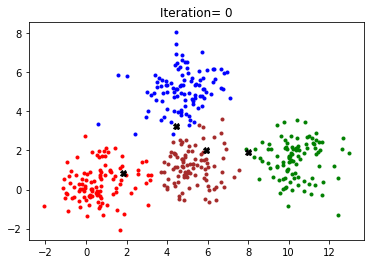

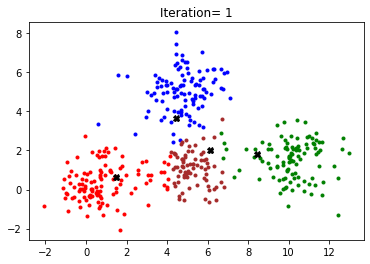

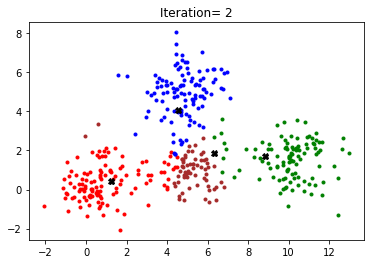

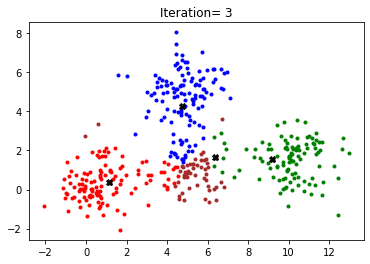

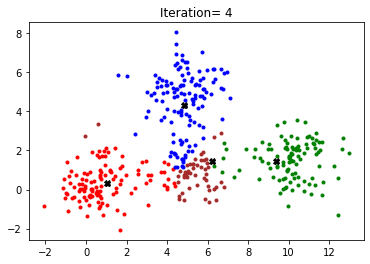

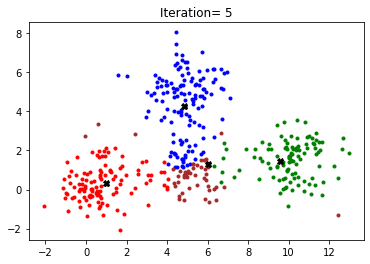

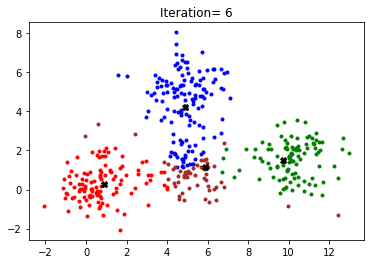

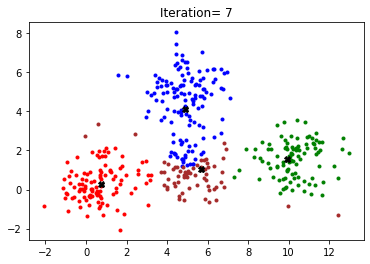

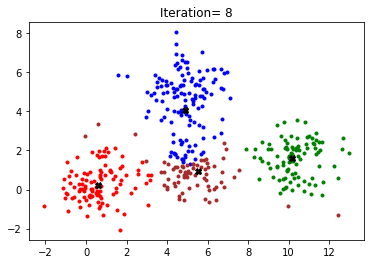

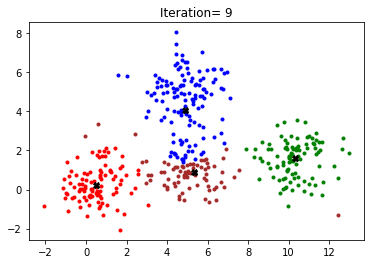

Final graph



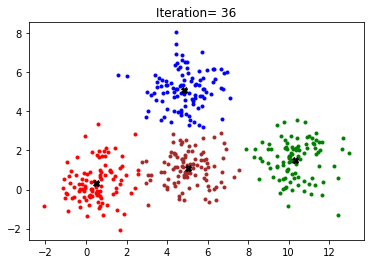

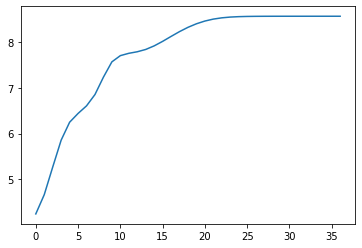

In [69]:
log_l=[]
Itr=100
clr=['red',"green","blue","brown"]

K = 4   # no. of clusters

theta=initialization(data,K)
for n in range(Itr):

    responsibility=E_Step_GMM(data,K,theta)

    cluster_label=np.argmax(responsibility,axis=1) #Label Points

    theta,log_likhd=M_Step_GMM(data,responsibility)

    log_l.append(log_likhd)
    if(n<10):
        plt.figure()
        for l in range(K):
            id=np.where(cluster_label==l)
            plt.plot(data[id,0],data[id,1],'.',color=clr[l])
        Centroids=theta[0].T
        plt.plot(Centroids[:,0],Centroids[:,1],'X',color='k')
        plt.title('Iteration= %d' % (n))
        plt.show()

    if n>2:
        if abs(log_l[n]-log_l[n-1])<benchmark or n==Itr-1:
            plt.figure()
            print("Final graph\n")
            for l in range(K):
                id=np.where(cluster_label==l)
                plt.plot(data[id,0],data[id,1],'.',color=clr[l])
            Centroids=theta[0].T
            plt.plot(Centroids[:,0],Centroids[:,1],'X',color='k')
            plt.title('Iteration= %d' % (n))
            plt.show()
            break

plt.figure()  
plt.plot(log_l)

In [70]:
centroids=np.transpose(theta[0])
Covariance=theta[1]
weights=theta[2]

predicted_scores_gmm=[]
for i in range(data.shape[0]):
    ans=[]
    for k in range(4):
        ll=weights[k]*(multivariate_normal.pdf(data[i,:],mean=centroids[k,:], cov=Covariance[:,:,k]))
        ans.append(ll)
    predicted_scores_gmm.append(np.argmax(ans))
print(predicted_scores_gmm)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [71]:
# write your code here
from sklearn.metrics import homogeneity_score
#For homogeneity Score
homogeneity_score_gmm=homogeneity_score(labels_true=actual_answers,labels_pred=predicted_scores_gmm)
print("homogeneity score",homogeneity_score_gmm)


predicted_scores_gmm=np.array(predicted_scores_gmm)
# For Silhouette Score
silhouette_value_gmm=0
for i in range(data.shape[0]):
    total_distance=0
    count=0
    x=data[i]
    cluster_of_x=predicted_scores_gmm[i]
    other_same_cluster=np.where(predicted_scores_gmm==cluster_of_x)[0]
    for point in other_same_cluster:
        if(point==i):
            continue
        total_distance+=modulus(data[point],x)
        count+=1
    average_dist_same_cluster=total_distance/(count+0.0001)

    total_distance=0
    count=0
    other_diff_cluster=np.where(predicted_scores_gmm!=cluster_of_x)[0]
    for point in other_diff_cluster:
        total_distance+=modulus(data[point],x)
        count+=1
    average_dist_other_clusters=total_distance/(count+0.0001)
    silhouette_value_gmm+=(average_dist_other_clusters-average_dist_same_cluster)/max(average_dist_other_clusters,average_dist_same_cluster)
    
silhouette_value_gmm/=400
print("Silhouette value",silhouette_value_gmm)





homogeneity score 0.9041484943675071
Silhouette value 0.7165860209334933


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [72]:
from sklearn.metrics import accuracy_score
print("For K means")
print("Silhouette_value_kmeans:-",silhouette_value_kmeans)
print("Homogeneity_score:- ",homogeneity_score_kmeans)
print("For GMM")
print("Silhouette_value_Gmm:-",silhouette_value_gmm)
print("Homogeneity_score:- ",homogeneity_score_gmm)


For K means
Silhouette_value_kmeans:- 0.7162687396015669
Homogeneity_score:-  0.9075740697566272
For GMM
Silhouette_value_Gmm:- 0.7165860209334933
Homogeneity_score:-  0.9041484943675071


# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [85]:
## Load Dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\Asus\Downloads\archive (1)\IRIS.csv")
data[['target']] = data[['species']].apply(lambda col:pd.Categorical(col).codes)
x = np.asarray(data[['sepal_length','sepal_width','petal_length','petal_width']].values.tolist())
y = (data[['species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])

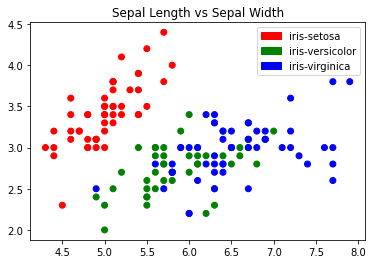

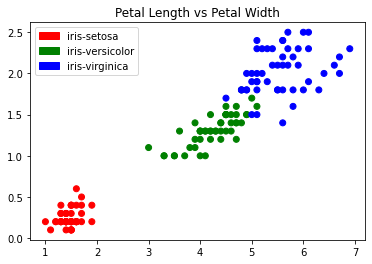

In [74]:
#plkot
import matplotlib.patches as mpatches
colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color=colors[0], label='iris-setosa')
green_patch = mpatches.Patch(color=colors[1], label='iris-versicolor')
blue_patch = mpatches.Patch(color=colors[2], label='iris-virginica')
legends=[red_patch, green_patch, blue_patch]


plt.scatter(data['sepal_length'], data['sepal_width'], c=colors[data['target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=legends)
plt.show()


plt.scatter(data['petal_length'], data['petal_width'], c= colors[data['target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=legends)
plt.show()

performance of our kmeans with 3 clusters= 0.7474865805095324
performance of scikit Kmeans with 3 clusters= 0.7649861514489815


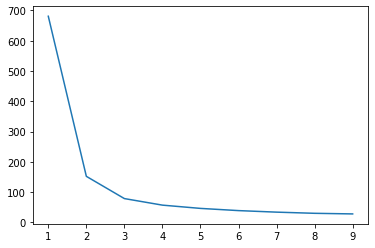

In [75]:
# k-means
from sklearn import metrics
from sklearn.cluster import KMeans

def K_means_ours(data,K,itr,benchmark):
    # random initialization of clusters
    index=np.random.randint(0,data.shape[0],K)
    Cents=data[index,:]

    # initialized a array to store distance, assigned label, minimum distance
    DAL=np.zeros((data.shape[0],K+2))
    error=[]
    F=data+10**(-5)   
    

    for n in range(itr):
    # assignment stage
        for i in range(F.shape[0]):
            for j in range(K):
                DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
            Dist=np.min(DAL[i,:K])
            
            ind=((np.where(Dist==DAL[i,:K])[0]))
            
            DAL[i,K]=ind.astype('int')
            DAL[i,K+1]=Dist

      # re-estimation stage
        for i in range(K):
            ind=np.where(DAL[:,K]==i)
            
            if (F[ind,:][0].shape[0])==0:
              id1=np.random.randint(0,data.shape[0],1)
              Cents[i,:]=F[id1,:]
            else:
              Cents[i,:]=np.mean(F[ind,:][0],axis=0)
        error.append(np.mean(DAL[:,K+1]))  
        if n>2:
            if pos_val(error[n]-error[n-1])<benchmark:
                break
        
    return DAL, Cents

DAL,cents=K_means_ours(x,3,100,benchmark)


predicted_kmeans=DAL[:,3]
print('performance of our kmeans with 3 clusters=',metrics.homogeneity_score(predicted_kmeans,target))

#Sklearn Kmeans
kmeans = KMeans(n_clusters=3,n_init=100,max_iter=100,verbose=0)
kmeans.fit(x)
predicted_kmeans_sk=kmeans.predict(x)
print('performance of scikit Kmeans with 3 clusters=',metrics.homogeneity_score(predicted_kmeans_sk,target))


dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters=no_of_clusters,max_iter=20)
    k_model.fit(x)
    dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

performance of our GMM= 0.7357206243754478
Confusion Matrix
 [[ 0 28 22]
 [50  0  0]
 [50  0  0]]
Initialization 0
Initialization converged: True
performance of sklearn= 0.7859016861703576
Confusion Matrix
 [[ 0 50  0]
 [49  0  1]
 [14  0 36]]


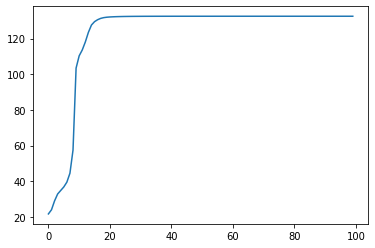

In [76]:
# write your code here

from sklearn.mixture import GaussianMixture as Gmm
K=3  # num of clusters

theta=initialization(x,K)
log_l=[]
for n in range(Itr):
    responsibility=E_Step_GMM(x,K,theta)
    cluster_label=np.argmax(responsibility,axis=1) #Label Points
    theta,log_likhd=M_Step_GMM(x,responsibility)
    log_l.append(log_likhd)


plt.figure()  
plt.plot(log_l)
# performance measure
predicted_gmm=cluster_label
print('performance of our GMM=',metrics.homogeneity_score(predicted_gmm,target))
print("Confusion Matrix\n",metrics.confusion_matrix(y_true=target,y_pred=predicted_gmm))



#sklearn
gmm=Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)
gmm.fit(x)

# performance measure
predicted_gmm_sk=gmm.predict(x)
print('performance of sklearn=',metrics.homogeneity_score(predicted_gmm_sk,target))
print("Confusion Matrix\n",metrics.confusion_matrix(y_true=target,y_pred=predicted_gmm_sk))